### An example showing the plot_precision_recall_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `precision_recall_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_precision_recall_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp
sp.__version__

'0.3.7'

In [2]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=False)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=0
)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((75, 804), (75, 804), (75,), (75,))

In [3]:
# Create an instance of the LogisticRegression
model = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
model = model.fit(X_train, y_train)

In [4]:
np.unique(y_train)

array([0, 1, 2])

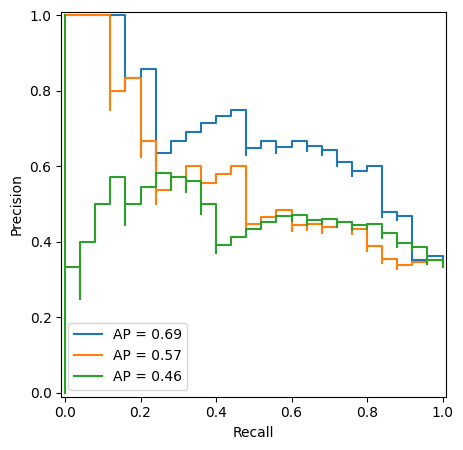

In [5]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn import metrics

y_val_prob = model.decision_function(X_val)

precision, recall, _ = precision_recall_curve(
    y_val==0, y_val_prob[:, 0],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(y_val==0, y_val_prob[:, 0])
pr_display = PrecisionRecallDisplay( precision=precision, recall=recall, average_precision=average_precision ).plot()

ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==1, y_val_prob[:, 1],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(y_val==1, y_val_prob[:, 1],)
pr_display = PrecisionRecallDisplay( precision=precision, recall=recall, average_precision=average_precision ).plot(ax = ax)


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==2, y_val_prob[:, 2],
    # pos_label=model.classes_[1]
)
average_precision = metrics.average_precision_score(y_val==2, y_val_prob[:, 2],)
pr_display = PrecisionRecallDisplay( precision=precision, recall=recall, average_precision=average_precision ).plot(ax = ax)

In [6]:
# Perform predictions
y_val_prob = model.decision_function(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob,
    pr_auc='average_precision',
);

TypeError: plot_precision_recall() got an unexpected keyword argument 'pr_auc'

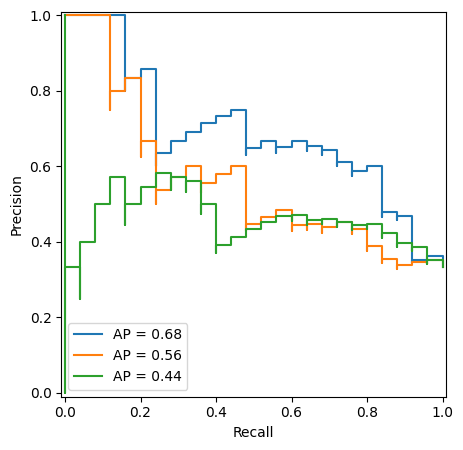

In [7]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn import metrics

y_val_prob = model.decision_function(X_val)

precision, recall, _ = precision_recall_curve(
    y_val==0, y_val_prob[:, 0],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(recall,precision)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot()


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==1, y_val_prob[:, 1],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(recall,precision)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot(ax = ax)


ax = plt.gca()
precision, recall, _ = precision_recall_curve(
    y_val==2, y_val_prob[:, 2],
    # pos_label=model.classes_[1]
)
average_precision = metrics.auc(recall,precision)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision).plot(ax = ax)

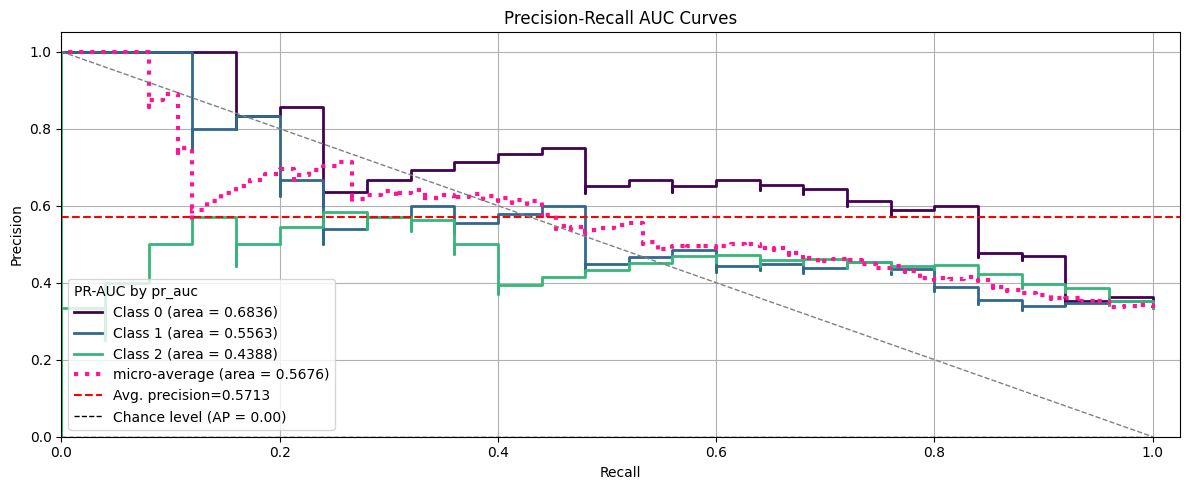

In [8]:
# Create an instance of the LogisticRegression
model = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
model = model.fit(X_train, y_train)

# Perform predictions
y_val_prob = model.decision_function(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob,
    area='pr_auc',
);

In [9]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

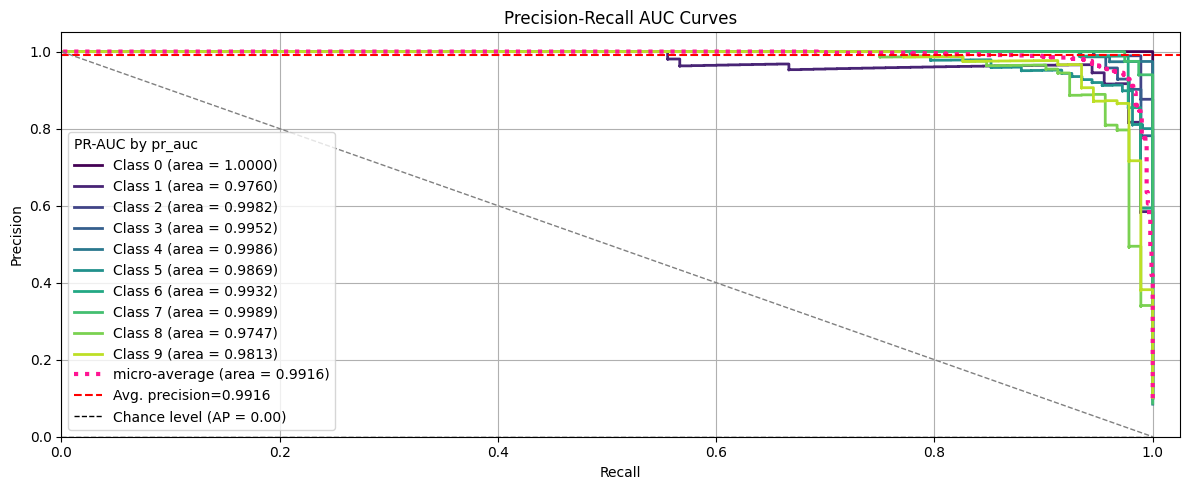

In [10]:
# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = sp.metrics.plot_precision_recall(
    y_val, y_val_prob
);

## Keras

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


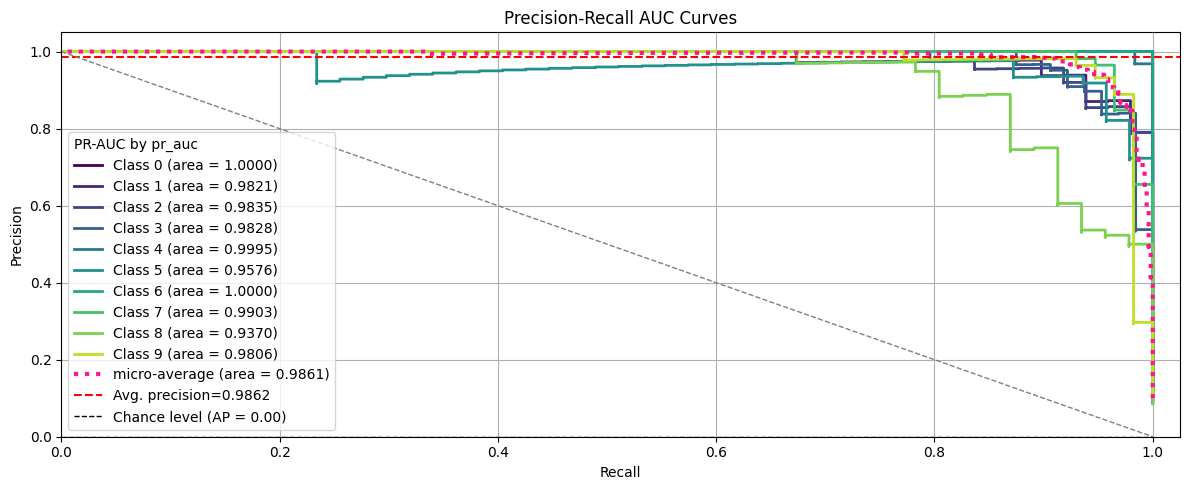

In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as sp

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train)
Y_val = tf.keras.utils.to_categorical(y_val)

# Define a simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_val, Y_val),
    verbose=0
)

# Predict probabilities on the validation set
y_probas = model.predict(X_val)

# Plot precision-recall curves
sp.metrics.plot_precision_recall(y_val, y_probas)
plt.show()

In [ ]:
sp.